In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Text(0, 0.5, 'Number of Titles')

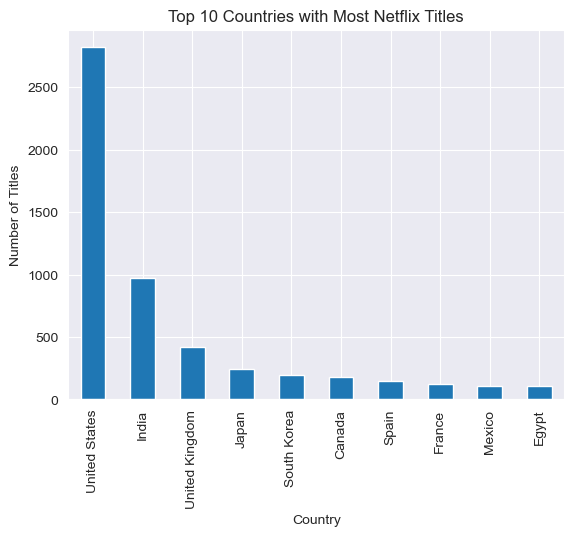

In [5]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

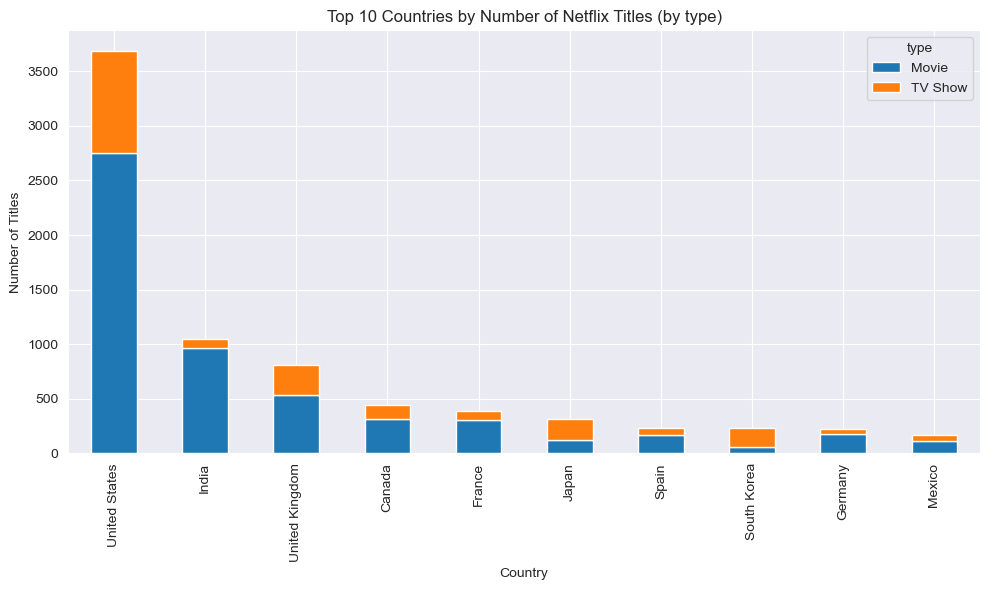

In [17]:
countries=df['country'].dropna().str.split(',').explode().str.strip()
top10=countries.value_counts().head(10).index.tolist()

df_exploded=df.assign(country=df['country'].dropna().str.split(",")).explode('country')
df_exploded["country"]=df_exploded["country"].str.strip()
df_top=df_exploded[df_exploded['country'].isin(top10)]

counts=df_top.groupby(['country','type']).size().unstack(fill_value=0).loc[top10]
counts.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Top 10 Countries by Number of Netflix Titles (by type)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('Top 10 Countries by Number of Netflix Titles (by type)')


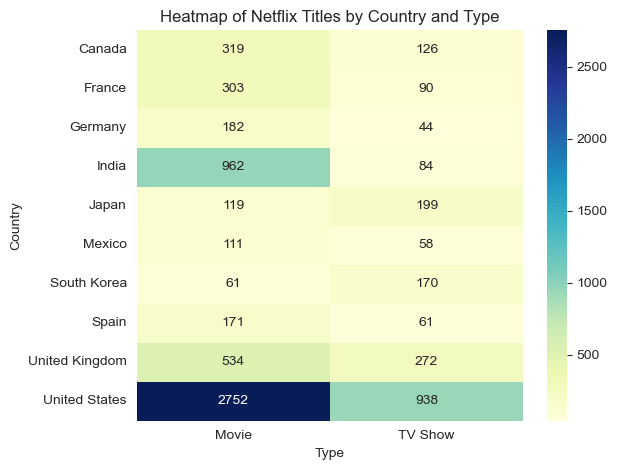

In [16]:
sns.heatmap(df_top.pivot_table(index='country',columns='type',aggfunc='size',fill_value=0),annot=True,fmt='d',cmap='YlGnBu')
plt.title('Heatmap of Netflix Titles by Country and Type')
plt.xlabel('Type')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('netflix_titles.png')

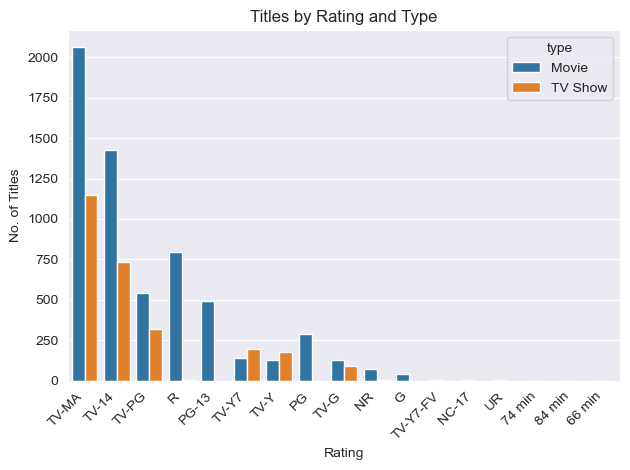

In [15]:
sns.countplot(data=df,x='rating',hue='type',order=df['rating'].dropna().value_counts().index.tolist())
plt.title("Titles by Rating and Type")
plt.xlabel("Rating")
plt.ylabel("No. of Titles")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig("titles_by_rating_and_type.png")

Which country has the highest number of TV Shows on Netflix?

In [19]:
countries.value_counts().head(1)

country
United States    3690
Name: count, dtype: int64

Which is the hghest rating category on Netflix?


In [21]:
df['rating'].value_counts().head(1)

rating
TV-MA    3207
Name: count, dtype: int64

How many types of rating categorys are there on Netflix?


In [22]:
df['rating'].nunique()

17

                                           End of Day 6